<a href="https://colab.research.google.com/github/NightBright/TSP/blob/main/TParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import heapq as hq
import math
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df= pd.read_excel('https://raw.githubusercontent.com/NightBright/TSP/main/poblaci%C3%B3n_expuesta_a_inundaciones_-_inei_2017.xlsx')

In [122]:
df

,INSTITUTO NACIONAL DE DEFENSA CIVIL\nDIRECCIÓN DE PREPARACIÓN\nSubdirección de Sistematización de Información sobre Escenarios de Riesgos de Desastres SD - SIERD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,POBLACIÓN EXPUESTA A PELIGRO MUY ALTO DE INUND...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,VIVIENDAS,POBLACIÓN
2,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.94139,-77.9771,1365,5361
3,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
4,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.42255,-78.453,311,1206
...,...,...,...,...,...,...,...,...
4004,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,NUEVO UNION DE JUANTIA TIPISHCA,-8.25023,-74.8314,2,2
4005,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVO SAN ANTONIO,-8.16975,-74.6099,1,1
4006,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVA FORTUNA,-8.48764,-74.3898,1,1
4007,UCAYALI,CORONEL PORTILLO,MASISEA,MONTE DE LOS OLIVOS,-8.55119,-74.3493,1,1


Normalizacion de datos

In [123]:
df_mask=df['INSTITUTO NACIONAL DE DEFENSA CIVIL\nDIRECCIÓN DE PREPARACIÓN\nSubdirección de Sistematización de Información sobre Escenarios de Riesgos de Desastres SD - SIERD']!='DEPARTAMENTO'
df = df[df_mask]

In [124]:
df_mask=df['INSTITUTO NACIONAL DE DEFENSA CIVIL\nDIRECCIÓN DE PREPARACIÓN\nSubdirección de Sistematización de Información sobre Escenarios de Riesgos de Desastres SD - SIERD']!='POBLACIÓN EXPUESTA A PELIGRO MUY ALTO DE INUNDACIÓN'
df = df[df_mask]

In [125]:
df

,INSTITUTO NACIONAL DE DEFENSA CIVIL\nDIRECCIÓN DE PREPARACIÓN\nSubdirección de Sistematización de Información sobre Escenarios de Riesgos de Desastres SD - SIERD,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.94139,-77.9771,1365,5361
3,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
4,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.42255,-78.453,311,1206
5,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.8149,-78.2774,177,577
6,AMAZONAS,UTCUBAMBA,CUMBA,TAGTAGO,-5.98102,-78.6302,202,562
...,...,...,...,...,...,...,...,...
4004,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,NUEVO UNION DE JUANTIA TIPISHCA,-8.25023,-74.8314,2,2
4005,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVO SAN ANTONIO,-8.16975,-74.6099,1,1
4006,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVA FORTUNA,-8.48764,-74.3898,1,1
4007,UCAYALI,CORONEL PORTILLO,MASISEA,MONTE DE LOS OLIVOS,-8.55119,-74.3493,1,1


In [126]:
#Renombramos las columnas
df.columns=['DEPARTAMENTO','PROVINCIA','DISTRITO','CENTRO POBLADO','LATITUD','LONGITUD','VIVIENDAS','POBLACIÓN']

In [127]:
df

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,VIVIENDAS,POBLACIÓN
2,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.94139,-77.9771,1365,5361
3,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
4,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.42255,-78.453,311,1206
5,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.8149,-78.2774,177,577
6,AMAZONAS,UTCUBAMBA,CUMBA,TAGTAGO,-5.98102,-78.6302,202,562
...,...,...,...,...,...,...,...,...
4004,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,NUEVO UNION DE JUANTIA TIPISHCA,-8.25023,-74.8314,2,2
4005,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVO SAN ANTONIO,-8.16975,-74.6099,1,1
4006,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVA FORTUNA,-8.48764,-74.3898,1,1
4007,UCAYALI,CORONEL PORTILLO,MASISEA,MONTE DE LOS OLIVOS,-8.55119,-74.3493,1,1


In [128]:
#Reindexamos
df=df.reset_index()

In [129]:
#Borramos la columna index que ha sido generada
df.drop('index', inplace=True, axis=1)

In [130]:
df

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,VIVIENDAS,POBLACIÓN
0,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.94139,-77.9771,1365,5361
1,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
2,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.42255,-78.453,311,1206
3,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.8149,-78.2774,177,577
4,AMAZONAS,UTCUBAMBA,CUMBA,TAGTAGO,-5.98102,-78.6302,202,562
...,...,...,...,...,...,...,...,...
3780,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,NUEVO UNION DE JUANTIA TIPISHCA,-8.25023,-74.8314,2,2
3781,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVO SAN ANTONIO,-8.16975,-74.6099,1,1
3782,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVA FORTUNA,-8.48764,-74.3898,1,1
3783,UCAYALI,CORONEL PORTILLO,MASISEA,MONTE DE LOS OLIVOS,-8.55119,-74.3493,1,1


In [131]:
df

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,VIVIENDAS,POBLACIÓN
0,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.94139,-77.9771,1365,5361
1,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
2,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.42255,-78.453,311,1206
3,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.8149,-78.2774,177,577
4,AMAZONAS,UTCUBAMBA,CUMBA,TAGTAGO,-5.98102,-78.6302,202,562
...,...,...,...,...,...,...,...,...
3780,UCAYALI,CORONEL PORTILLO,NUEVA REQUENA,NUEVO UNION DE JUANTIA TIPISHCA,-8.25023,-74.8314,2,2
3781,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVO SAN ANTONIO,-8.16975,-74.6099,1,1
3782,UCAYALI,CORONEL PORTILLO,CALLERIA,NUEVA FORTUNA,-8.48764,-74.3898,1,1
3783,UCAYALI,CORONEL PORTILLO,MASISEA,MONTE DE LOS OLIVOS,-8.55119,-74.3493,1,1


Comienzo de Busqueda

In [83]:
print("Escoja un Departamento donde comenzará su ruta de viaje")
dep=input()
df_Q3 = df['DEPARTAMENTO']==dep
df_Q3 = df[df_Q3]
print("En cual de las siguientes provincias comenzará su ruta de viaje")
print(df_Q3['PROVINCIA'])
pro=input()
df_Q3 = df['PROVINCIA']==pro
df_Q3 = df[df_Q3]
###
print("¿Desea recorrer todos los distritos de la provincia escogida?")
print(df_Q3['DISTRITO'])
pre=input()
if pre=='si':
  df_Q3
else:
  print("¿Deseas recorrer algunos distritos de la provincia escogida?")
  pre1=input()
  if pre1=='si':
    print(df_Q3['DISTRITO'])
    print("¿Cuantos distritos quiere visitar?")
    nun1=input()
    print("¿Cuales son los distritos que quiere visitar?-Escriba los nombres")
    print(df_Q3['DISTRITO'])
    dis1=[input() for _ in range(int(nun1))]
    df_Q3=df_Q3[(df_Q3['DISTRITO'].isin(dis1))]
    df_Q3  
  else:
    ###
    print("En cual de los siguientes distritos comenzará su ruta de viaje")
    print(df_Q3['DISTRITO'])
    dis=input()
    df_Q3 = df['DISTRITO']==dis
    df_Q3 = df[df_Q3]
    print("¿Desea recorrer todos los centros poblados de esta provincia?")
    asw=input()
    if asw == 'si':
      print("Estos son los centros poblados a donde va a recorrer")
      print(df_Q3)
    else:
      print("¿Cuantos centros poblados que quiere visitar?")
      nun=input()
      print("¿Cuales son los poblados que quiere visitar?-Escriba los nombres")
      print(f_Q3['CENTRO POBLADO'])
      pob=[input() for _ in range(int(nun))]
      df_Q3=df_Q3[(df_Q3['CENTRO POBLADO'].isin(pob))]
      df_Q3  


Escoja un Departamento donde comenzará su ruta de viaje
AMAZONAS
En cual de las siguientes provincias comenzará su ruta de viaje
0         BONGARA
1       UTCUBAMBA
2           BAGUA
3       UTCUBAMBA
4       UTCUBAMBA
5       UTCUBAMBA
6           BAGUA
7           BAGUA
8         BONGARA
9       UTCUBAMBA
10        BONGARA
11          BAGUA
12        BONGARA
13        BONGARA
14      UTCUBAMBA
15        BONGARA
16    CHACHAPOYAS
17        BONGARA
18      UTCUBAMBA
19      UTCUBAMBA
20      UTCUBAMBA
21      UTCUBAMBA
22      UTCUBAMBA
23        BONGARA
24      UTCUBAMBA
Name: PROVINCIA, dtype: object
UTCUBAMBA
¿Desea recorrer todos los distritos de la provincia escogida?
1     LONYA GRANDE
3         CAJARURO
4            CUMBA
5          JAMALCA
9       EL MILAGRO
14           CUMBA
18           CUMBA
19    LONYA GRANDE
20    LONYA GRANDE
21           CUMBA
22    LONYA GRANDE
24    LONYA GRANDE
Name: DISTRITO, dtype: object
no
¿Deseas recorrer algunos distritos de la provincia escogi

Sacamos la latitud y la longitud de cada dato

In [85]:
df_Q3

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,VIVIENDAS,POBLACIÓN
1,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.09637,-78.4225,698,2896
3,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.8149,-78.2774,177,577
5,AMAZONAS,UTCUBAMBA,JAMALCA,PUERTO NARANJITOS,-5.82154,-78.2757,102,360
19,AMAZONAS,UTCUBAMBA,LONYA GRANDE,MANCARRON,-6.09659,-78.4285,2,4
20,AMAZONAS,UTCUBAMBA,LONYA GRANDE,BOLIVIA,-6.10133,-78.4278,1,3
22,AMAZONAS,UTCUBAMBA,LONYA GRANDE,MATULI,-6.10633,-78.4169,1,1
24,AMAZONAS,UTCUBAMBA,LONYA GRANDE,ARCURCO,-6.10101,-78.4175,0,0


Almacen de coordenadas X y Y de la seleccion

In [86]:
cord_x=[]
for i in df_Q3['LATITUD']:
  cord_x.append(abs(i))

In [87]:
cord_x

[6.096373, 5.814901, 5.82154, 6.096585, 6.101328, 6.106335, 6.101007]

In [88]:
cord_y=[]
for i in df_Q3['LONGITUD']:
  cord_y.append(abs(i))

In [89]:
cord_y

[78.422516, 78.277449, 78.275662, 78.428543, 78.427833, 78.416907, 78.417463]

Obteniendo los datos del nombre de cada selección por indice

In [90]:
nameQ=[]
for i,value in enumerate(df_Q3['CENTRO POBLADO']):
  nameQ.append((i,value))


In [91]:
nameQ

[(0, 'LONYA GRANDE'),
 (1, 'NARANJITOS'),
 (2, 'PUERTO NARANJITOS'),
 (3, 'MANCARRON'),
 (4, 'BOLIVIA'),
 (5, 'MATULI'),
 (6, 'ARCURCO')]

Obtencion de arcos

In [92]:
arc=[(i,j) for i in range(len(df_Q3)) for j in range(len(df_Q3)) if i!=j]
arc

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5)]

Dibujando las coordenadas

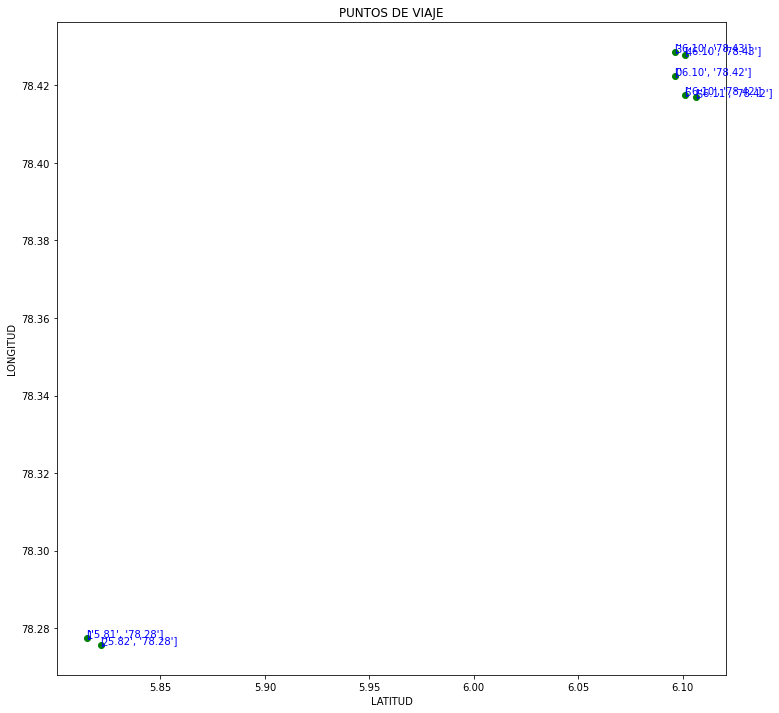

In [93]:
plt.figure(figsize=(12,12))
plt.scatter(cord_x,cord_y, color='green')

plt.title("PUNTOS DE VIAJE")#Le damos un titulo al grafico
plt.xlabel("LATITUD")
plt.ylabel("LONGITUD")
plt.show

#Colocamos las coordenadas encima de los puntos
V=[]
for i in range(len(cord_x)):
  #almacenamos en una lista temporal las coordenadas por cada iteracion, ya que se reiniciará en 0 
  temp=[]
  temp.append("%.2f"%cord_x[i])
  temp.append("%.2f"%cord_y[i])
  #Luego lo colocamos en una matriz para tener almacenado cada cordenada por lista 
  V.append(temp)

#Mostramos las posiciones
for i in range(len(cord_x)):
  plt.annotate(str(V[i]), xy=(cord_x[i], cord_y[i]), xytext=(cord_x[i],cord_y[i]+0.0004),color='blue')

#Mostramos el indice de las ciudades
for i in range(len(cord_x)):
  plt.annotate(str(i), xy=(cord_x[i], cord_y[i]), xytext=(cord_x[i],cord_y[i]),color='blue')



Calculamos las distancias euclidianas de cada punto

In [94]:
DEucli={(i,j,np.hypot(cord_x[i]-cord_x[j],cord_y[i]-cord_y[j])) for i,j in arc}

In [95]:
DEucli

{(0, 1, 0.31665584042142536),
 (0, 2, 0.3116075660265672),
 (0, 3, 0.006030727402232475),
 (0, 4, 0.00726790987836618),
 (0, 5, 0.011432511753769293),
 (0, 6, 0.006856147970984888),
 (1, 0, 0.31665584042142536),
 (1, 2, 0.006875295630009229),
 (1, 3, 0.31964867071833775),
 (1, 4, 0.32350544629882294),
 (1, 5, 0.3230825128662912),
 (1, 6, 0.31852874820335814),
 (2, 0, 0.3116075660265672),
 (2, 1, 0.006875295630009229),
 (2, 3, 0.3146781724015865),
 (2, 4, 0.31849228905108984),
 (2, 5, 0.3178967474668455),
 (2, 6, 0.3133836748938918),
 (3, 0, 0.006030727402232475),
 (3, 1, 0.31964867071833775),
 (3, 2, 0.3146781724015865),
 (3, 4, 0.004795847057610614),
 (3, 5, 0.015180875995812032),
 (3, 6, 0.011929814918939498),
 (4, 0, 0.00726790987836618),
 (4, 1, 0.32350544629882294),
 (4, 2, 0.31849228905108984),
 (4, 3, 0.004795847057610614),
 (4, 5, 0.012018632409732052),
 (4, 6, 0.010374967036101065),
 (5, 0, 0.011432511753769293),
 (5, 1, 0.3230825128662912),
 (5, 2, 0.3178967474668455),
 (5, 3

Almacenamos el resultado en un csv para poder leerlo como grafo

In [96]:
df_edges=pd.DataFrame(DEucli)
df_edges.to_csv(r'/content/sample_data/Edges.csv', index = False)

Almacenamos el csv

In [97]:
G= pd.read_csv("/content/sample_data/Edges.csv")

#GRAPH STUFF

In [ ]:
import graphviz as gv
import networkx as nx

def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    pp = pathparams if path and path[v] == u else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

def adjmatrix2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '5'}):
  return nx2gv(nx.from_numpy_matrix(G), weighted, params)
             
def adjlist2gv(G, type='digraph', weighted=False, params={'rankdir': 'LR'}):
  digraph = type == 'digraph'
  if digraph:
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G')
  Gv.attr(**params)

  n = len(G)
  for i in range(n):
    g.node(str(i))
             
  for u in range(n):
    if weighted:
      for v, w in range(n):
        g.edge(str(u), str(v), str(w))
        if digraph:
          g.edge(str(v), str(u), str(w))
    else:
      for v in range(n):
        g.edge(str(u), str(v))
        if digraph:
          g.edge(str(v), str(u))

  return g
      
def path2gv(path, params={'rankdir': 'LR', 'size': '5'}):
  g = gv.Digraph('G')
  g.attr(**params)
              
  n = len(path)
  for i in range(n):
    g.node(str(i))

  for v, u in enumerate(path):
    if u != -1:
      g.edge(str(u), str(v))

  return g
              
def wedges2adjlist(filename: str, type='graph'):
  with open(filename) as file:
    data = []
    n = 0
    for line in file:
      if line[0] != '#':
        data.append([int(x) for x in line.strip().split(',')])
        if data[-1][0] > n: n = data[-1][0]
        if data[-1][1] > n: n = data[-1][1]

  n += 1
  G = [[] for _ in range(n)]
  for u, v, w in data:
    G[u].append((v, w))
    if type == 'graph':
      G[v].append((u, w))
              
  return G

#Segunda Parte

Dibujamos el grafo

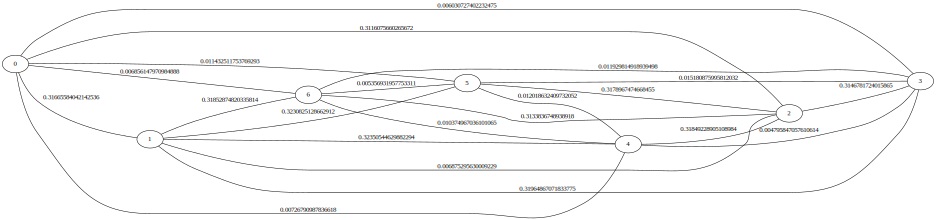

In [98]:
G = nx.read_weighted_edgelist('/content/sample_data/Edges.csv', create_using=nx.Graph, delimiter=',', nodetype=int)
nx2gv(G,params={'rankdir': 'LR', 'size': '13'}, weighted=True)

#Dijkstra todos los caminos

In [99]:
def calculatePath(G):
  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

In [100]:

cont_hop=[0]
all_path=[]
weights=[]
def _dijkstra(G,s,q):
  if len(q)!=0:
    g_u, u = hq.heappop(q) 
    if not G.nodes[u]['visited']: 
      G.nodes[u]['visited'] = True 
      if cont_hop[0]==(len(G.nodes())-1):
        G.nodes[0]['visited'] = False
      for v in G.neighbors(u): 
        if not G.nodes[v]['visited']: 
          if G.nodes[v]['prime']==True and cont_hop[0]==(len(G.nodes())-1):
            w_uv = G.edges[u, v]['weight']
            f_v  = g_u + w_uv 
            weights.append(f_v)
            G.nodes[v]['path'] = u 
            pathTotal=calculatePath(G)
            all_path.append(pathTotal)
            G.nodes[v]['path'] = -1
            G.nodes[v]['cost'] = math.inf
            G.nodes[v]['visited'] = True 
          
          elif not G.nodes[v]['prime']:
            cont_hop[0]=cont_hop[0]+1  
            w_uv = G.edges[u, v]['weight'] 
            f_v  = g_u + w_uv 
            g_v  = G.nodes[v]['cost']
            if f_v < g_v:         
              G.nodes[v]['cost'] = f_v 
              G.nodes[v]['path'] = u 
              hq.heappush(q, (f_v, v)) 
              _dijkstra(G,s,q)
              cont_hop[0]=cont_hop[0]-1
              G.nodes[v]['path'] = -1
              G.nodes[v]['cost'] = math.inf
              G.nodes[v]['visited'] = False

              
      
        
  

def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False      
    G.nodes[u]['path']    = -1         
    G.nodes[u]['cost']    = math.inf   
    #
    G.nodes[u]['prime'] = False

  G.nodes[s]['cost'] = 0
  G.nodes[s]['prime']= True 
  q = [(0, s)] 
  
  _dijkstra(G,s,q)

  return all_path



In [101]:
#Buscador de nombres de la consulta realizada
def nameNode(value):
  for i,j in nameQ:
    if value == i:
      return j

In [102]:
#Guardamos la lista de caminos posibles
lstPth=dijkstra(G, 0)

In [103]:
#Mostramos la lista de caminos posibles#(n-1)!
print("TODAS LAS POSIBLES RUTAS SON LAS SIGUIENTES")
lstPth

TODAS LAS POSIBLES RUTAS SON LAS SIGUIENTES


[[4, 0, 3, 1, 6, 2, 5],
 [6, 0, 3, 1, 5, 2, 4],
 [5, 0, 3, 1, 2, 6, 4],
 [6, 0, 3, 1, 2, 4, 5],
 [4, 0, 3, 1, 5, 6, 2],
 [5, 0, 3, 1, 6, 4, 2],
 [4, 0, 5, 1, 2, 6, 3],
 [2, 0, 4, 1, 5, 6, 3],
 [2, 0, 5, 1, 6, 4, 3],
 [5, 0, 4, 1, 6, 2, 3],
 [4, 0, 6, 1, 5, 2, 3],
 [5, 0, 6, 1, 2, 4, 3],
 [2, 0, 4, 1, 6, 3, 5],
 [4, 0, 6, 1, 2, 3, 5],
 [6, 0, 5, 1, 2, 3, 4],
 [4, 0, 5, 1, 6, 3, 2],
 [2, 0, 6, 1, 5, 3, 4],
 [6, 0, 4, 1, 5, 3, 2],
 [2, 0, 5, 1, 3, 6, 4],
 [5, 0, 6, 1, 3, 2, 4],
 [2, 0, 6, 1, 3, 4, 5],
 [6, 0, 5, 1, 3, 4, 2],
 [6, 0, 4, 1, 3, 2, 5],
 [5, 0, 4, 1, 3, 6, 2],
 [3, 0, 1, 4, 6, 2, 5],
 [4, 0, 1, 6, 3, 2, 5],
 [3, 0, 1, 6, 5, 2, 4],
 [6, 0, 1, 4, 5, 2, 3],
 [4, 0, 1, 5, 6, 2, 3],
 [6, 0, 1, 5, 3, 2, 4],
 [4, 0, 1, 2, 5, 6, 3],
 [5, 0, 1, 2, 6, 4, 3],
 [4, 0, 1, 2, 6, 3, 5],
 [6, 0, 1, 2, 5, 3, 4],
 [5, 0, 1, 2, 3, 6, 4],
 [6, 0, 1, 2, 3, 4, 5],
 [3, 0, 1, 5, 2, 6, 4],
 [5, 0, 1, 6, 2, 3, 4],
 [3, 0, 1, 6, 2, 4, 5],
 [6, 0, 1, 5, 2, 4, 3],
 [5, 0, 1, 4, 2, 6, 3],
 [6, 0, 1, 4, 2,

In [104]:
#Elija el camino que desee dibujar
G_n = nx.DiGraph()
for i,value in enumerate(lstPth[2]): #<---Elija 
  G_n.add_edge(nameNode(value) ,nameNode(i))

nx2gv(G_n)

#Dijkstra menor camino

In [105]:

cont_hop=[0]
all_path=[]
weights=[]
def _dijkstra_for_shorter(G,s,q):
  if len(q)!=0:
    g_u, u = hq.heappop(q) 
    if not G.nodes[u]['visited']: 
      G.nodes[u]['visited'] = True 
      if cont_hop[0]==(len(G.nodes())-1):
        G.nodes[0]['visited'] = False
      for v in G.neighbors(u): 
        if not G.nodes[v]['visited']: 
          if G.nodes[v]['prime']==True and cont_hop[0]==(len(G.nodes())-1):
            w_uv = G.edges[u, v]['weight']
            f_v  = g_u + w_uv 
            weights.append(f_v)
            G.nodes[v]['path'] = u 
            pathTotal=calculatePath(G)
            all_path.append(pathTotal)
            G.nodes[v]['path'] = -1
            G.nodes[v]['cost'] = math.inf
            G.nodes[v]['visited'] = True 
          
          elif not G.nodes[v]['prime']:
            cont_hop[0]=cont_hop[0]+1  
            w_uv = G.edges[u, v]['weight'] 
            f_v  = g_u + w_uv 
            g_v  = G.nodes[v]['cost']
            if f_v < g_v:         
              G.nodes[v]['cost'] = f_v 
              G.nodes[v]['path'] = u 
              hq.heappush(q, (f_v, v)) 
              _dijkstra_for_shorter(G,s,q)
              cont_hop[0]=cont_hop[0]-1
              G.nodes[v]['path'] = -1
              G.nodes[v]['cost'] = math.inf
              G.nodes[v]['visited'] = False

              
      
        
  

def dijkstra_for_shorter(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False      
    G.nodes[u]['path']    = -1         
    G.nodes[u]['cost']    = math.inf   
    #
    G.nodes[u]['prime'] = False

  G.nodes[s]['cost'] = 0
  G.nodes[s]['prime']= True 
  q = [(0, s)] 
  
  _dijkstra(G,s,q)
  return min(weights)



In [106]:
cont_hop=[0]
#all_path=[]
paths_min=[]
weights=[]
def _dijkstraFindShorter(G,s,q,min_path):
  if len(q)!=0:
    g_u, u = hq.heappop(q) 
    if not G.nodes[u]['visited']: 
      G.nodes[u]['visited'] = True 
      if cont_hop[0]==(len(G.nodes())-1):
        G.nodes[0]['visited'] = False
      for v in G.neighbors(u): 
        if not G.nodes[v]['visited']: 
          if G.nodes[v]['prime']==True and cont_hop[0]==(len(G.nodes())-1):
            w_uv = G.edges[u, v]['weight']
            f_v  = g_u + w_uv 
            weights.append(f_v)
            G.nodes[v]['path'] = u 
            pathTotal=calculatePath(G)
            #all_path.append(pathTotal)
            G.nodes[v]['path'] = -1
            G.nodes[v]['cost'] = math.inf
            G.nodes[v]['visited'] = True
            if min_path == f_v:
              print("EL PESO DE ESTE CAMINO ES ",min_path)
              paths_min.append(pathTotal)

          elif not G.nodes[v]['prime']:
            cont_hop[0]=cont_hop[0]+1  
            w_uv = G.edges[u, v]['weight'] 
            f_v  = g_u + w_uv 
            g_v  = G.nodes[v]['cost']
            if f_v < g_v:         
              G.nodes[v]['cost'] = f_v 
              G.nodes[v]['path'] = u 
              hq.heappush(q, (f_v, v)) 
              _dijkstraFindShorter(G,s,q,min_path)
              cont_hop[0]=cont_hop[0]-1
              G.nodes[v]['path'] = -1
              G.nodes[v]['cost'] = math.inf
              G.nodes[v]['visited'] = False

              
      
        
  

def dijkstra2(G, s, min_path):
  for u in G.nodes:
    G.nodes[u]['visited'] = False      
    G.nodes[u]['path']    = -1         
    G.nodes[u]['cost']    = math.inf   
    #
    G.nodes[u]['prime'] = False

  G.nodes[s]['cost'] = 0
  G.nodes[s]['prime']= True 
  q = [(0, s)] 
  
  _dijkstraFindShorter(G,s,q,min_path)
  #print("hola")
  return paths_min

In [107]:
def shorterPath(G,s):
  #Para que mini se llene del minimo tiene que pasarle el minimo de la lista de pesos que esta en la funcion dijkstra
  Mini=dijkstra_for_shorter(G, s)
  return dijkstra2(G, s, Mini)


In [108]:
#Le pasamos a una lista el camino mas corto encontrado
print("LOS CAMINOS MÁS CORTOS DEL GRAFO")
lstShort=shorterPath(G,0)

LOS CAMINOS MÁS CORTOS DEL GRAFO
EL PESO DE ESTE CAMINO ES  0.6651169497726548
EL PESO DE ESTE CAMINO ES  0.6651169497726548


In [109]:
print(lstShort)

[[3, 0, 1, 4, 5, 6, 2], [1, 2, 6, 0, 3, 4, 5]]


In [110]:
#Creamos una lista donde se almacenen los arcos
lstTupla=[]
for i,value in enumerate(lstShort[0]):#<---primer camino
  lstTupla.append((value,i))

In [111]:
lstTupla

[(3, 0), (0, 1), (1, 2), (4, 3), (5, 4), (6, 5), (2, 6)]

In [112]:
#Buscador de nombres de la consulta realizada
def nameNode(value):
  for i,j in nameQ:
    if value == i:
      return j

In [113]:
#Graficamos el punto más corto
G_s = nx.DiGraph()
for i,value in enumerate(lstShort[1]):
  G_s.add_edge(nameNode(value) ,nameNode(i))

In [114]:
print("LA RUTA MÁS CORTA QUE SE PUEDE REALIZAR")
nx2gv(G_s)

LA RUTA MÁS CORTA QUE SE PUEDE REALIZAR


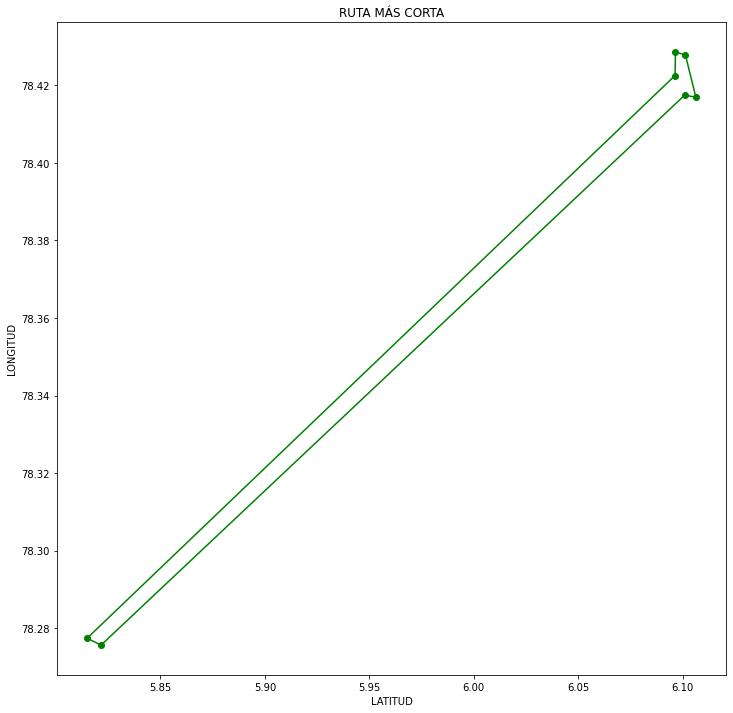

In [115]:
plt.figure(figsize=(12,12))


plt.title("RUTA MÁS CORTA")#Le damos un titulo al grafico
plt.xlabel("LATITUD")
plt.ylabel("LONGITUD")

plt.scatter(cord_x,cord_y, color='green',zorder=1)

for i,j in lstTupla:
  plt.plot([cord_x[i],cord_x[j]],[cord_y[i],cord_y[j]],color='green',zorder=1)


plt.show()


#Mostramos el indice de las ciudades


#Apuntes BLOCK

In [ ]:
#for i in range(len(df_Q2)):
#  print(df_Q2[])

In [ ]:
#is_male = df.loc[3, 'LATITUD'] == -6.09637
#is_male
#h=df_2[df_2['DEPARTAMENTO'] == 'AMAZONAS']
#h

In [ ]:
lista=[-2.5,-40.5,-4.5]
#Valor absoluto a la lista
hola=[abs(float(x)) for x in lista ]

In [ ]:
hola

In [ ]:
cord_y

In [ ]:
df_2.dtypes

In [ ]:
type(Prueba)

In [ ]:
Prueba=[(i,j,np.hypot(cord_x[i]-cord_x[j],cord_y[i]-cord_y[j])) for i,j in arc]

In [ ]:
#Diccionario de datos
DEucli={(i,j):np.hypot(cord_x[i]-cord_x[j],cord_y[i]-cord_y[j]) for i,j in arc}

La idea es primero graficar en un plano cartesiano los puntos, luego al tenerlo, hacer la matriz de adyacencia para poder meterlo a la funcion USC del profesor previamente modificado para que nos retorne el menor viaje, luego que lo optenemos lo mostramos, y luego mostramos toda la lista de posibles viajes 